In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
from scipy import signal
import scipy
from scipy import io

In [46]:
#####     A)

In [12]:
def exp_convolve(arr1, arr2):
    result_arr = np.array(np.repeat(0,len(arr1) + len(arr2) - 1))
    
    
    for i in np.arange(len(arr2)):
        for p in np.arange(len(arr1)):
            result_arr[p+i] += (arr2[i] * arr1[p])
    return result_arr
    
    

In [13]:
exp_convolve([4,1,2,5],[1,2,-1])

array([ 4,  9,  0,  8,  8, -5])

In [ ]:
#using scipy convolve to check work

In [16]:
signal.convolve([4,1,2,5],[1,2,-1])

array([ 4,  9,  0,  8,  8, -5])

In [15]:
exp_convolve([10,5,6,-8,8,7],[1,2,-1,5])

array([ 10,  25,   6,  49,  11,  61, -34,  33,  35])

In [14]:
signal.convolve([10,5,6,-8,8,7],[1,2,-1,5])

array([ 10,  25,   6,  49,  11,  61, -34,  33,  35])

In [ ]:
#####     B)

In [20]:
x = [0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0]

<StemContainer object of 3 artists>

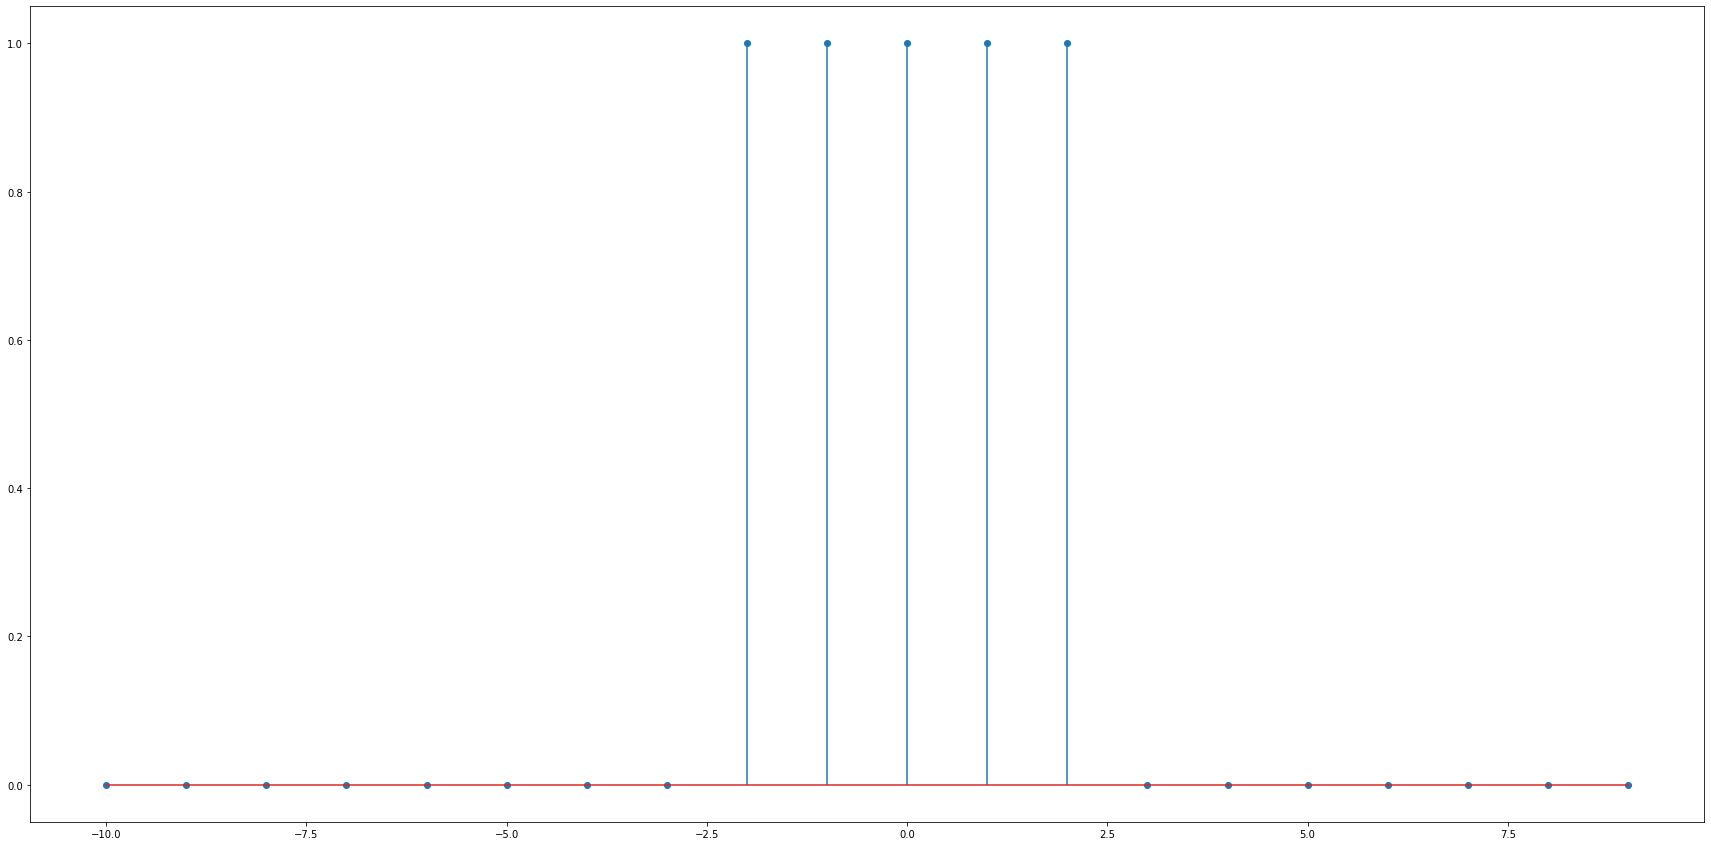

In [48]:
time_axis = np.arange(-10,10).astype(int)

fig, ax1 = plt.subplots(1,1,figsize=(30,15))
ax1.stem(time_axis,x )

In [25]:
rect_convolve_signal = exp_convolve(x,x)

<StemContainer object of 3 artists>

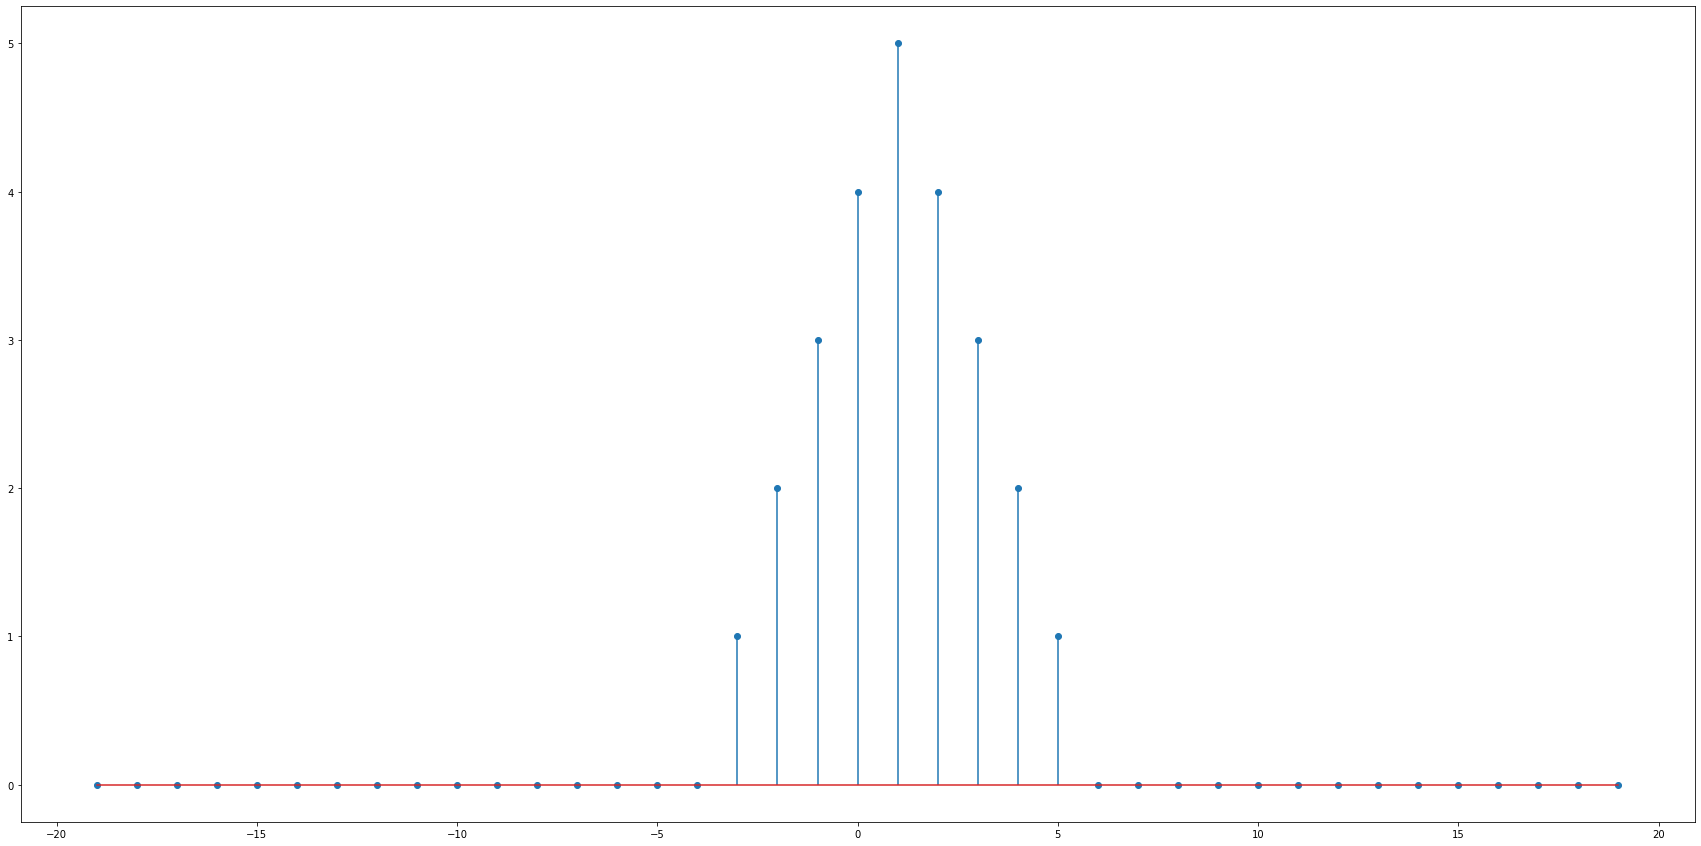

In [28]:
time_axis = np.arange(-19,20).astype(int)

fig, ax1 = plt.subplots(1,1,figsize=(30,15))
ax1.stem(time_axis, rect_convolve_signal)

In [ ]:
#####     C)

In [44]:
signal = io.wavfile.read('/home/v/Downloads/result2.wav')
right_channel = signal[1][:,1]
right_channel

array([ 64, 120, 128, ..., -16,  -7,  -8], dtype=int16)

In [45]:
length = len(right_channel) / 8000
length

3.29725

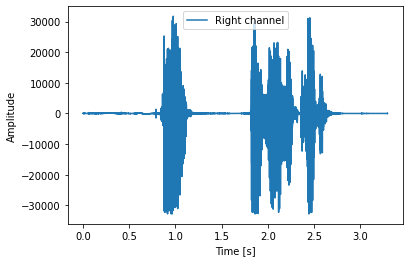

In [52]:
time = np.linspace(0., length, len(right_channel))
plt.plot(time, right_channel, label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [49]:
len(right_channel)

26378

In [ ]:
#length should be around 3 seconds, if I just look at the length 
#of the array then I get 26378 which is the 
#number of seconds divided by the sampling rate of 8k Hz, if we 
#sample at 8k Hz or everysecond, we end up 
# with the number of actual discrete signal entries 
#at 8k * (time of signal in sec) 

In [53]:
3.29725 * 8_000

26378.0

In [ ]:
#####     D)

In [59]:
avg_filter = np.repeat(1/100, 100)
avg_filter

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [60]:
filter_signal = exp_convolve(right_channel,avg_filter)

In [61]:
filter_signal

array([0, 1, 2, ..., 0, 0, 0])

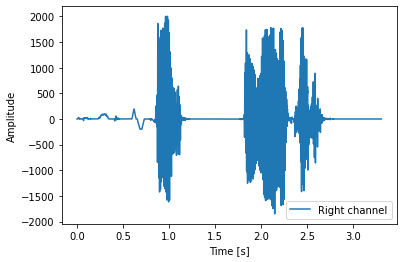

In [64]:
time = np.linspace(0., len(filter_signal) / 8000, len(filter_signal))
plt.plot(time, filter_signal, label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
## Noticing the amplitude values are much smaller compared 
#to original signal [-2000,2000] from [-30_000,30_000]

In [ ]:
#####     E)

In [68]:
io.wavfile.write('/home/v/Downloads/result3.wav',8000,filter_signal.astype(np.int16) )

In [ ]:
## When I listen to it there is no background noise or buzzing 
#compared to the original, only the parts where I am 
#clearly speaking are played back, my voice does sound
#kind of muffled/robotic in the filtered version, and the volume 
#of the filtered version seems a little quieter 
#compared to the original